In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

The computational tasks are all described with a common framework, exploiting their similarities. They are designed to analyse and probe the different systems' ability to deal with complex temporally patterned input sequences, employing *real-world computational tasks*, *common benchmark tasks* used in the domain of computer science and machine learning as well as *explicit experimental paradigms* employed in the domain of cognitive science and psychology. The overarching goal of the projects covered by this framework is to determine whether the network's dynamics is rich enough to perform relevant functional mappings and, especially, how. For this purpose, we implement a functional test battery to probe the dynamics and solution spaces found between very different functional architectures and evaluate their differences and commonalities.

# **7. Complete task examples**

In this notebook, we exemplify and explain how to use the current formalism to setup a variety of complex computational tasks (input-output mappings) with concrete task examples. 

# 7.1. Symbolic mappings

* All the tasks described in this section consist of one or multiple sequences of discrete `tokens` (stimuli, symbols or values), arranged as a patterned temporal sequence $S_{u}(t)=\sigma_{1}, ..., \sigma_{T}$. 

* The symbols are drawn from a finite alphabet or vocabulary, $\mathcal{A} = \{{\sigma_{1}, ..., \sigma_{|\mathcal{A}|}}\}$, following a set of predefined rules (explained in the sections below). 

* The elements in the sequence can be arbitrary abstract symbols, real-world data or dynamic patterns (see [embeddings](embeddings.ipynb)).

* A *word*, *string* or *frame* of length $k$ is a finite set $\sigma_{1}, ..., \sigma_{k}$ of elements of $\mathcal{A}$. 

* The *language* $\mathcal{L} \supset L_{n}(u)$, $\forall n \in U$ is the collection of sets of all words of length $n$ occuring in the input space $U$. (...)

**Note:** For all symbolic targets, the actual `target_matrix` used to train the linear readouts is a one-hot-encoded version of the target sequence, unless otherwise stated.

## 7.1.1. Default sequence mappings

In the presence of a symbolic sequence, and regardless of the specificities of the task at hand, there is a set of default mappings that apply and that can be used to probe some interesting functional properties. These will be implemented by default, employing a multitude of independent readouts, one for each target output. 

To generate the inputs, we can use any of the sequencers described in [1](symbolic_sequences.ipynb), but, for simplicity, we will exemplify using the simplest, random sequencer and a relatively small sequence.

In [2]:
from fna.tasks.symbolic.sequences import SymbolicSequencer

In [3]:
# random input sequence
vocabulary_size = 5
T = 100

sequencer = SymbolicSequencer(label='random sequence', set_size=vocabulary_size)
sequence = sequencer.generate_random_sequence(T=T)

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:140 - INFO] Generating a random sequence of length 100, from a set of 5 symbols


* **Stimulus classification** -- The simplest and generic identity mapping task. Regardless of the nature of the input stimuli, the task consists of determining the correct stimulus labels, i.e. $z(t) = u(t), \forall t \in T$. 

In [4]:
target_outputs = sequencer.generate_default_outputs(sequence, max_memory=0, max_chunk=0, max_prediction=0, chunk_memory=False, chunk_prediction=False)

print(target_outputs[0]['label'])
display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': target_outputs[0]['output'], 'Accept': target_outputs[0]['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


* **Stimulus memory** -- Discrete memorization task. Measures the ability to retain informaton about the last $k$ stimuli in the sequence, i.e. $z(t) = u(t-k), \forall t \in T$ for various delays $k$. 

In [5]:
n_mem = 10
target_outputs = sequencer.generate_default_outputs(sequence, max_memory=n_mem, max_chunk=0, max_prediction=0, chunk_memory=False, chunk_prediction=False)

for out in target_outputs:
    print(out['label'])
    display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': out['output'], 'Accept': out['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


1-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1
Accept,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2
Accept,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


3-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2
Accept,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


4-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1
Accept,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


5-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2
Accept,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


6-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2
Accept,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


7-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2
Accept,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


8-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4
Accept,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


9-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4
Accept,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


10-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,None,None,None,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0
Accept,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


* **Stimulus prediction** -- in connectionism, the standard approach to evaluate a system's performance is to determine its ability to predict upcoming items in the sequence. Accurate predictions indicate that the system has learned the rules, more than individual representations. If the input sequence is deterministic, we evaluate the system's ability to predict the upcoming $k$ items: $z(t) = u(t+k), \forall t \in T$ for various prediction windows.

In [6]:
n_for = 5
target_outputs = sequencer.generate_default_outputs(sequence, max_memory=0, max_chunk=0, max_prediction=n_for, chunk_memory=False, chunk_prediction=False)

for out in target_outputs:
    print(out['label'])
    display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': out['output'], 'Accept': out['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


1-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


2-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False


3-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None,None,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False


4-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None,None,None,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False


5-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None,None,None,None,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False


* **Chunking** -- a common hypothesis in sequence processing studies is that chunking the sequence into frequent items (n-grams), comprising combinations of subordinate items,  constitutes a critical strategy used to process them. This process would alleviate working memory load, for example. 

In [7]:
max_chunk = 5

target_outputs = sequencer.generate_default_outputs(sequence, max_memory=0, max_chunk=max_chunk, max_prediction=0, chunk_memory=False, chunk_prediction=False)

for out in target_outputs:
    print(out['label'])
    display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': out['output'], 'Accept': out['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,32,24,42,22,24,40,03,34,40,03,33,30,04,41,14,40,02,23,31,12,21,14,42,22,20,02,22,23,31,10,01,14,42,24,44,41,13,34,42,20,02,24,40,01,11,11,12,22,20,02,24,44,44,44,43,30,02,21,13,34,43,34,40,04,44,41,14,44,41,13,31,13,31,12,20,01,11,14,44,40,04,44,44,41,14,44,43,32,20,04,44,42,22,22,21,12,22,21,10
Accept,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


3-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,324,242,422,224,240,403,034,340,403,033,330,304,041,414,140,402,023,231,312,121,214,142,422,220,202,022,223,231,310,101,014,142,424,244,441,413,134,342,420,202,024,240,401,011,111,112,122,220,202,024,244,444,444,443,430,302,021,213,134,343,434,340,404,044,441,414,144,441,413,131,313,131,312,120,201,011,114,144,440,404,044,444,441,414,144,443,432,320,204,044,442,422,222,221,212,122,221,210
Accept,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


4-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,3242,2422,4224,2240,2403,4034,0340,3403,4033,0330,3304,3041,0414,4140,1402,4023,0231,2312,3121,1214,2142,1422,4220,2202,2022,0223,2231,2310,3101,1014,0142,1424,4244,2441,4413,4134,1342,3420,4202,2024,0240,2401,4011,0111,1112,1122,1220,2202,2024,0244,2444,4444,4443,4430,4302,3021,0213,2134,1343,3434,4340,3404,4044,0441,4414,4144,1441,4413,4131,1313,3131,1312,3120,1201,2011,0114,1144,1440,4404,4044,0444,4441,4414,4144,1443,4432,4320,3204,2044,0442,4422,4222,2221,2212,2122,1221,2210
Accept,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


5-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,32422,24224,42240,22403,24034,40340,03403,34033,40330,03304,33041,30414,04140,41402,14023,40231,02312,23121,31214,12142,21422,14220,42202,22022,20223,02231,22310,23101,31014,10142,01424,14244,42441,24413,44134,41342,13420,34202,42024,20240,02401,24011,40111,01112,11122,11220,12202,22024,20244,02444,24444,44443,44430,44302,43021,30213,02134,21343,13434,34340,43404,34044,40441,04414,44144,41441,14413,44131,41313,13131,31312,13120,31201,12011,20114,01144,11440,14404,44044,40444,04441,44414,44144,41443,14432,44320,43204,32044,20442,04422,44222,42221,22212,22122,21221,12210
Accept,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**Note:** We can also evaluate the system's ability to memorize and predict n-grams

In [8]:
target_outputs = sequencer.generate_default_outputs(sequence, max_memory=2, max_chunk=3, max_prediction=1, chunk_memory=True, chunk_prediction=True)

for out in target_outputs:
    print(out['label'])
    display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': out['output'], 'Accept': out['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


1-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1
Accept,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-step memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2
Accept,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,32,24,42,22,24,40,03,34,40,03,33,30,04,41,14,40,02,23,31,12,21,14,42,22,20,02,22,23,31,10,01,14,42,24,44,41,13,34,42,20,02,24,40,01,11,11,12,22,20,02,24,44,44,44,43,30,02,21,13,34,43,34,40,04,44,41,14,44,41,13,31,13,31,12,20,01,11,14,44,40,04,44,44,41,14,44,43,32,20,04,44,42,22,22,21,12,22,21,10
Accept,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-chunk 1-memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,32,24,42,22,24,40,03,34,40,03,33,30,04,41,14,40,02,23,31,12,21,14,42,22,20,02,22,23,31,10,01,14,42,24,44,41,13,34,42,20,02,24,40,01,11,11,12,22,20,02,24,44,44,44,43,30,02,21,13,34,43,34,40,04,44,41,14,44,41,13,31,13,31,12,20,01,11,14,44,40,04,44,44,41,14,44,43,32,20,04,44,42,22,22,21,12,22,21
Accept,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-chunk 2-memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,32,24,42,22,24,40,03,34,40,03,33,30,04,41,14,40,02,23,31,12,21,14,42,22,20,02,22,23,31,10,01,14,42,24,44,41,13,34,42,20,02,24,40,01,11,11,12,22,20,02,24,44,44,44,43,30,02,21,13,34,43,34,40,04,44,41,14,44,41,13,31,13,31,12,20,01,11,14,44,40,04,44,44,41,14,44,43,32,20,04,44,42,22,22,21,12
Accept,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


2-chunk 1-prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,32,24,42,22,24,40,03,34,40,03,33,30,04,41,14,40,02,23,31,12,21,14,42,22,20,02,22,23,31,10,01,14,42,24,44,41,13,34,42,20,02,24,40,01,11,11,12,22,20,02,24,44,44,44,43,30,02,21,13,34,43,34,40,04,44,41,14,44,41,13,31,13,31,12,20,01,11,14,44,40,04,44,44,41,14,44,43,32,20,04,44,42,22,22,21,12,None
Accept,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


3-chunk recognition


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,324,242,422,224,240,403,034,340,403,033,330,304,041,414,140,402,023,231,312,121,214,142,422,220,202,022,223,231,310,101,014,142,424,244,441,413,134,342,420,202,024,240,401,011,111,112,122,220,202,024,244,444,444,443,430,302,021,213,134,343,434,340,404,044,441,414,144,441,413,131,313,131,312,120,201,011,114,144,440,404,044,444,441,414,144,443,432,320,204,044,442,422,222,221,212,122,221,210
Accept,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


3-chunk 1-memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,324,242,422,224,240,403,034,340,403,033,330,304,041,414,140,402,023,231,312,121,214,142,422,220,202,022,223,231,310,101,014,142,424,244,441,413,134,342,420,202,024,240,401,011,111,112,122,220,202,024,244,444,444,443,430,302,021,213,134,343,434,340,404,044,441,414,144,441,413,131,313,131,312,120,201,011,114,144,440,404,044,444,441,414,144,443,432,320,204,044,442,422,222,221,212,122,221
Accept,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


3-chunk 2-memory


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,None,324,242,422,224,240,403,034,340,403,033,330,304,041,414,140,402,023,231,312,121,214,142,422,220,202,022,223,231,310,101,014,142,424,244,441,413,134,342,420,202,024,240,401,011,111,112,122,220,202,024,244,444,444,443,430,302,021,213,134,343,434,340,404,044,441,414,144,441,413,131,313,131,312,120,201,011,114,144,440,404,044,444,441,414,144,443,432,320,204,044,442,422,222,221,212
Accept,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


3-chunk 1-prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,None,None,None,None,324,242,422,224,240,403,034,340,403,033,330,304,041,414,140,402,023,231,312,121,214,142,422,220,202,022,223,231,310,101,014,142,424,244,441,413,134,342,420,202,024,240,401,011,111,112,122,220,202,024,244,444,444,443,430,302,021,213,134,343,434,340,404,044,441,414,144,441,413,131,313,131,312,120,201,011,114,144,440,404,044,444,441,414,144,443,432,320,204,044,442,422,222,221,212,None
Accept,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


1-step prediction


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0,None
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


## 7.1.2. Default string-level mappings

Some default mappings apply only to sequences that can be organized into meaningfull strings (i.e. the sequencer object contains a string_set). To exemplify, we will employ an `ArtificialGrammar` sequencer.

* **Ordinal knowledge** -- within sentence position [DehaeneEtAl:2015] (computed within strings)

* **String legality** -- this task is also referred to as grammaticality judgements, algebraic pattern recognition or identifying rule violations.

## 7.1.3. Invariant recognition and cross-modal generalization

Generalizes the identity task to include variability in each token presentation. The system ought to be able to recognize the stimulus identity despite variations of its precise spatiotemporal structure. To achieve this, we define a stimulus set where each input token has multiple instances or manually `warp` the stimulus, by modifying the kernel parameters (see temporal unfolding) of a generated signal, or temporally extended warping [].. (e.g. MNIST, spoken digits, spoken words, sequential MNIST, ...)

This implementation allows us to test recognition invariance in the presence of spatial / spectral and temporal variations in stimulus presentation. The implementation of these tasks thus relies on the use of the `FrontEnds`, or manual warping..
* Stimulus classification
* Invariance (space)
* Invariance (time)
* Multi-modality

#### **Spatial invariance** - MNIST 

In [10]:
from fna.tasks.preprocessing import ImageFrontend
image_mnist = ImageFrontend(path='../../data/mnist/', label='mnist', vocabulary=sequencer.tokens)

[embeddings.py:28 - INFO] Creating symbolic embeddings
[preprocessing.py:89 - INFO] MNIST target directory is not empty! Loading existing data...
[preprocessing.py:55 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=70000


[preprocessing.py:382 - INFO] Generating stimulus sequence: 10 symbols


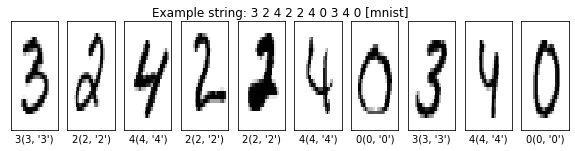

In [11]:
image_mnist.plot_sample(sequence[:10])

In [12]:
target_outputs = sequencer.generate_default_outputs(sequence, max_memory=0, max_chunk=0, max_prediction=0, chunk_memory=False, chunk_prediction=False)
for out in target_outputs:
    print(out['label'])
    display(HTML(pd.DataFrame({'Input': sequence, 'Ouput': out['output'], 'Accept': out['accept']}).transpose().to_html(header=False)))

classification


Input,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Ouput,3,2,4,2,2,4,0,3,4,0,3,3,0,4,1,4,0,2,3,1,2,1,4,2,2,0,2,2,3,1,0,1,4,2,4,4,1,3,4,2,0,2,4,0,1,1,1,2,2,0,2,4,4,4,4,3,0,2,1,3,4,3,4,0,4,4,1,4,4,1,3,1,3,1,2,0,1,1,4,4,0,4,4,4,1,4,4,3,2,0,4,4,2,2,2,1,2,2,1,0
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


#### **Temporal invariance** - spoken digits 

In [13]:
from fna.tasks.preprocessing import AudioFrontend
spoken_digits = AudioFrontend(path='../../data/hdspikes/', label='hdspikes', vocabulary=sequencer.tokens, resolution=0.1, language="english")

[embeddings.py:28 - INFO] Creating symbolic embeddings
[preprocessing.py:467 - INFO] Heidelberg digits spiking dataset: 
[preprocessing.py:221 - INFO] Loading SHD dataset...
shd_test.h5: 100%|██████████| 2264/2264 [00:46<00:00, 44.62it/s]
[preprocessing.py:230 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=5090


[embeddings.py:656 - INFO] Generating stimulus sequence: 10 symbols
[embeddings.py:606 - INFO] Concatenating stimulus sequence


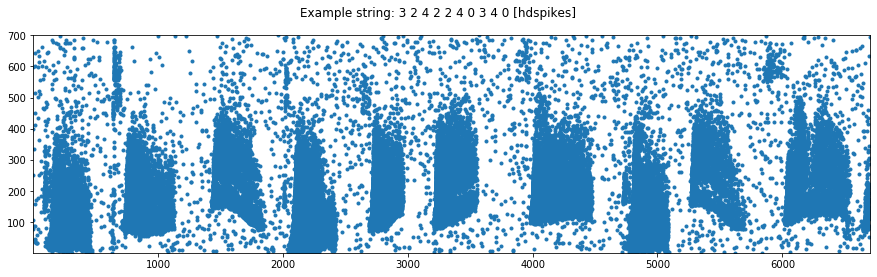

In [14]:
spoken_digits.plot_sample(sequence[:10], continuous=True, display=True, save=False)

In [ ]:
# TODO - time_warp()

# 7.2. Cognitive / behavioral tasks
This category covers both tasks that have been empyrically applied to human/animal subjects, in the domains of cognitive science and psychology as well as computational tasks used to evaluate cognitive models. Each task has its own peculiarities..

## 7.2.1. The Elman language

This task measures context-sensitivity and frequency-dependent representations.
The alphabet consists of $6$ symbols/tokens ($\mathcal{A} = \{b, d, g, a, i, u\}$), organized as variable length words: $ba, dii, guu$ (see [Elman1990]). The words are fixed, but alternate randomly, i.e., vowels occur randomly but following a given consonant, the identity and number of subsequent vowels is regular. The main idea is to provide variability in the context duration, thus requiring the networks to build *inventories* of all allowed sequences with different temporal extents. The input symbol statistics are different from each other (e.g. there are $3$ times more $u$s than $a$s).

Similarly to previous tasks, performance is assessed in two ways: 

1. exact prediction, where we take a `winner-takes-all` approach on the network's output and compare it with the actual next symbol in the test sequence 
2. corrected, where we compute the prediction performance exclusively for the symbols that can be deterministically predicted, i.e., the vowels ($a$, $i$ and $u$).

**Task summary**:
* String set - $\mathrm{S}^{u} = \{ [ba], [dii], [guuu] \}$
* Stimulus set - $\sigma^{u} \in \mathcal{A},$ with $\mathcal{A} = \{ a, b, d, i, g, u \}$
* Stimulus sequence - $u \in \mathbb{R}^{N^{u} \times T}$
* Input dimensionality - $N^{u} = \#\mathcal{A}$


In [ ]:
from fna.tasks.symbolic import ArtificialGrammar

Elman = {    
    'label': 'Elman',     
    'alphabet': ['b', 'a', 'd', 'i', 'g', 'u'], 
    'states': ['b', 'a', 'd', 'i1', 'i2', 'g', 'u1', 'u2', 'u3'], 
    'start_states': ['b', 'd', 'g'], 
    'terminal_states': ['a', 'i2', 'u3'],
    'transitions': [('b', 'a', 1.), ('d', 'i1', 1.), ('i1', 'i2', 1.), ('g', 'u1', 1.), ('u1', 'u2', 1.), ('u2', 'u3', 1.)]}

elman = ArtificialGrammar(**Elman)
elman.generate_string_set(n_strings=10, correct_strings=True)

In [ ]:
# generate_outputs

## 7.2.2. Artificial Grammar Learning

* **Serial Reaction Time** - assessed as peak classification performance for a binary decision (grammatical/ungrammatical) after stimulus offset
* **Grammaticality** - similar to human endorsement rates, fraction of correctly classified strings as gramm or ungramm.. partitioned also based on associative chunk strength.

![Human endorsement rates as a function of grammar TE](figures/HumanAGL_complexity.png)

## 7.2.3. Learning Non-Adjacent Dependencies

The main motivation to study sequences with non-adjacent dependencies relates to working memory load. Resolving dependencies spanning multiple items requires information to be maintained..

* **Linear distance (*counting*)** - working memory task, employing frames of the type $A_{n} (n \times X) B_{n}$ where $X$ is a distractor stimulus (intervening between the dependent items) and $n$ determines the dependency length (i.e. to resolve the dependency (accurately predict the last item in a string/frame), the system needs to retain contextual information in working memory and `count` how many distractors it has seen (see, e.g. [[1](https://www.frontiersin.org/articles/10.3389/neuro.10.023.2009/full)].

* **Variability and invariance** - In [Gomez2002] it has been shown that the ability to learn non-adjacent dependencies depends on the relative variability of the intervening material, i.e., when trained with artificial strings of the form $aXb$, individuals show greater sensitivity to the dependence ($a _ b$), when the set of elements from which $X$ is drawn is large. So, it seems that high variability in the set size from which an intervening middle element is drawn facilitates learning of the relationship between the non-adjacent elements. In this task, we explore this effect in our network models, while attempting to compare the results of the human performance data presented in [Gomez2002], see also [Okun].

Two languages:
$$L1: S \rightarrow \{ aXd, bXe, cXf \}$$
$$L2: S \rightarrow \{ aXe, bXf, cXd \},$$ with 
$X \rightarrow X_{1}, X_{2}, X_{n};$ $n = 1, 2, 6, 12$ or $24$.

* **Number and Type** - right-branching, crossed, nested with variable number of dependencies 

**References:**
[[1](https://www.frontiersin.org/articles/10.3389/neuro.10.023.2009/full)] - 

In [ ]:
from fna.tasks.symbolic import NonAdjacentDependencies

n_strings = 10
vocabulary_size = 2
filler_variability = 1
dependency_length = 4

nad = NonAdjacentDependencies(vocabulary_size, filler_variability, dependency_length) # dependency_type
# nad.eos = '#'
nad.generate_stringset(set_length=n_strings, generator=False, violations=None)

print("\nExample strings: " + str(nad.string_set[:10]))
print("\nExample sequence: " + str(nad.generate_sequence()[:30]))

## 7.2.4. Context-free and context-sensitive languages
Processing context-sensitive languages requires additional computational
 resources, in comparison with context-free [Boden2000].
 
In this task, we study how networks learn to predict (finite) subsets of context-free (of the type $A^{n}B^{n}$) and
 context-sensitive (of the type $A^{n}B^{n}C^{n}$) languages.
 
 The task these networks face is, again, to predict the next symbol in strings of the form $A^{n}B^{n}$ and $A^{n}B^{n}C^{n}$,
 with $1 \leq n \leq 10$, randomly drawn from a distribution skewed towards shorter $n$, i.e., $P(n=1) = 0.3$,
 $P(n=2) = 0.2$, $P(n=3) = 0.17$, $P(n=4) = 0.1$, $P(n=5) = 0.07$, $P(n=6) = 0.05$, $P(n=7) = 0.03$, $P(n=8) = 0.03$,
 $P(n=9) = 0.03$ and $P(n=10) = 0.02$.

For sequences of the type $A^{n}B^{n}C^{n}$, the network should be able to predict the number of $B$s and $C$s. When
$A$ is presented, the network cannot deterministically predict the location of the first $B$, given that $n$ is variable
and the network doesn't initially know which is the current value of $n$. It is not until the first $B$ has appeared
that the network can be expected to predict the remaining letters. Thus,


\begin{table}[h!]
    \begin{tabular}{lccccccccccccccccccccc}
      Input:	& A & A & A & A & A & B & B & B & B & B & C & C & C & C & C & A & A & B & B & C & C \\ 
      Output: & A & A & A & A & B & B & B & B & B & C & C & C & C & C & A & A & B & B & C & C & ~ \\ 
      Accept:	& ~ & ~ & ~ & ~ & ~ & * & * & * & * & * & * & * & * & * & * & ~ & ~ & * & * & * & ~ \\
    \end{tabular}
\end{table}


## 7.2.5. Continuous memorization (12AX)

# 7.3. Cognitive / behavioral experimental paradigms

## 7.3.1. Delayed match-to-sample task (WM)

* Short-term / working associative memory
* Similar to the non-adjacent dependency task, with variable delay $(A X_{n} B)$.
* Corresponds to temporal unfolding the nAD task, with some constraints

In [ ]:
from fna.tasks.symbolic import NonAdjacentDependencies
from fna.tasks.symbolic.embeddings import VectorEmbeddings

In [ ]:
n_strings = 10
vocabulary_size = 1
filler_variability = 1
dependency_length = 5

nad = NonAdjacentDependencies(vocabulary_size, filler_variability, dependency_length) # dependency_type
nad.eos = None
nad.generate_stringset(set_length=n_strings, generator=False, violations=None)

In [ ]:
seq = nad.generate_sequence()

In [ ]:
one_hot = VectorEmbeddings(vocabulary=nad.tokens).one_hot()

# Remove stimuli during delay period (may or may not be necessary)
stim_keys = [x for x in one_hot.stimulus_set.keys() if x[0]=='X']
for k in stim_keys:
    one_hot.stimulus_set[k] = np.zeros_like(one_hot.stimulus_set[one_hot.vocabulary[0]])

one_hot.plot_sample(seq, save=False)

In [ ]:
signal_pars = {
    'duration': 150., # single values or rvs
    'amplitude': 10., # single value, list of dim, or rvs
    'kernel': ('sin', {'mean_amplitude': 1., 'frequency': 10., 'phase_shift': 0.}),# ('box', {}), # (kernel, {kernel_pars})
    'dt': 0.1 # dt
}
sig = one_hot.unfold(to_signal=True, **signal_pars)

sig.plot_sample(seq[:10], continuous=True, intervals=None, display=True, save=False)

stim_seq, _ = sig.draw_stimulus_sequence(sequence, onset_time=0.1, continuous=True, intervals=None)
print(stim_seq, stim_seq.t_start, stim_seq.t_stop)

## 7.3.2. Deviant detection (*odd-ball*)

== Grammaticality judgements..

## 7.3.3. Blind source separation (*Treismann*)

This task, which also constitutes a difficult signal processing task, consists on the separation of a set of source signals from a set of mixed signals, with minimal information about the identity and characteristics of the different source signals or the mixing process. Despite being a complex engineering problem, the human brain can handle this type of tasks effortlessly. Within the domain of cognitive science, this task was used to study processes of selective attention [], employing the *cocktail party* problem.

## 7.3.3. Trail-making test (*)

## 7.3.5. Stroop interference test

## 7.3.6. Porteus Maze (*)

## 7.3.7. Wisconsion Card sorting

## 7.3.8. The *flash-lag* effect

## 7.3.9. Virtual navigation
Sequencing motor primities

# 7.4. Natural Language Processing

See [gensim](https://radimrehurek.com/gensim/auto_examples/index.html) and [nltk](https://www.nltk.org/)

## 7.4.1. Annottated corpora

## 7.4.2. Semantic dependencies

While syntactic dependency annotations concentrate on the surface or functional structure of a sentence,  semantic dependency annotations aim to capture between-word relationships that are more closely related to the meaning of a sentence, using graph-structured representations... [see](https://github.com/tdozat/Parser-v3)

* Semantic role labelling

* Word sense disambiguation

# 7.5. Analog processing tasks

Refers to common benchmark tasks in the domains of computer science and signal processing. 

Synthetic analog timeseries described in continuous time..

**Note:** Tasks that rely on (random) analogue inputs are generated as symbolic sequences of length $T$ and $N_{u}=T$ symbols, with scalar embeddings. Alternatively these continuous signals can be generated externally and loaded as scalar or vector embeddings. 

## 7.5.1. Information processing capacity

An important experiment used throughout this project allows us to quantify the capacity of a (fading-memory) dynamical system to perform arbitrary transformations on an input, i.e. its information processing capacity. Originally proposed in [[1](https://www.nature.com/articles/srep00514)], it extends the notion of passive fading memory to nonlinear transformations of increasing degrees of complexity. 
This metric is considered a special case and has been developed independently, given its heavy computational requirements. The main simulations are implemented with the common formalism described above, but the analysis is performed offline in custom-built, highly scalable software [[2](https://github.com/rcfduarte/processing_capacity.git)].

The system is passively driven by a time-dependent input signal $u(t)$, of finite total length $T$ (typically $T\leq10^5$, comprising values independent- and identically drawn (i.i.d.) from a pre-determined probability distribution $p(u)$. In the formalism described above, this corresponds to a symbolic sequence of $T$ unique symbols, with a scalar embedding over $p_{u}$. The system's input-driven dynamics $x[u(t)]$ are gathered at runtime and stored for further, offline processing. 

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:140 - INFO] Generating a random sequence of length 1000, from a set of 1000 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 1000 symbols encoded as scalar-uniform
[embeddings.py:219 - INFO] Generating stimulus sequence: 131 symbols


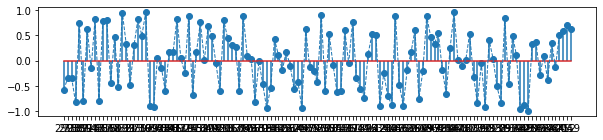

In [15]:
from fna.tasks.symbolic.sequences import SymbolicSequencer
from fna.tasks.symbolic.embeddings import VectorEmbeddings

T = 1000

sequencer = SymbolicSequencer(label='random sequence', set_size=T)
sequence = sequencer.generate_random_sequence(T=T)

embedding = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=1, distribution=np.random.uniform, parameters={
    'low': -1., 'high': 1.})

embedding.plot_sample(sequencer.draw_subsequences(n_subseq=1, seq=sequence, length_range=(100, 150))[0], save=False)

The aim of the analysis is to quantify the system’s ability to carry out computations on $u$. For that purpose, we gather the system's states in response to the input, $x[u(t)]$ and measure the capacity $C$ to reconstruct time-dependent functions $z(t)$ on finite sequences of $k$ inputs, $z(t) = z(u^{−k}(t))$, from the state of the system, using a simple linear estimator. Evaluating the capacity to reconstruct individual functions $z$ ($C[X, z]$) for large sets of target functions $y_{l} = \{z_{1}, ..., z_{L} \}$, allows us to gain insights into the information processing capacity of the system. If the evaluated functions are sufficiently distinct (preferably orthogonal), their corresponding capacities measure independent properties and provide independent information about how the system computes. As such, we systematically probe the capacity space by evaluating the set of orthonormal basis functions of $u$, using finite products of normalized Legendre polynomials:

$$y_{\{d_{k}\}} = \prod_{k} \mathcal{P}_{d_{k}} (u(t-k)))$$

where $\mathcal{P}_{d_{k}}(.)$ is the Legendre polynomial of degree $d_{k}\geq0$:

$$\mathcal{P}_{d}(s) = \frac{1}{2^{d}} \sum_{i=0}^{d} \bigl(\begin{smallmatrix}
    d \\
    i \end{smallmatrix}\bigr)^{2} (s - 1)^{d-i} (s + 1)^{i}
$$

and is a function of input $u$ delayed by $k$ steps. The total capacity then corresponds to the sum of the individual capacities for a given set of target functions $y_{\{d_{k}\}}$:

$$\mathrm{C}_{\{d_{k}\}} = \sum_{\{d_{k}\}} \mathrm{C}[X, y_{\{d_{k}\}}]$$

Naturally, we use finite data and a finite set of indices $d$ to evaluate the capacities, leading to an unavoidable underestimation of the total capacity. 

Given the large space of target functions that need to be evaluated for the metric to be complete, the numerical implementation is very computationally heavy, which is why development on this particular aspect took off separately from the main benchmarking tool [[2](https://github.com/rcfduarte/processing_capacity.git)]. The implementation consists of two main steps: 1) computation of polynomial products, and 2) computation of capacity against each polynomial. The two steps differ significantly in their resource consumption requirements, and therefore require different parallelization strategies.

**Polynomial Computation** - The algorithm has been optimized by removing redundant computations and precomputing the Legendre polynomials. Python code optimizations such as the use of LRU caching have been introduced. Finally, the most compute intensive parts of the code have been re-written in Cython. Distributed-memory parallelization has been implemented using MPI. Inter-rank communication via the network is limited to barrier synchronization. Due to the large amount of data to be communicated between ranks, the application uses file I/O instead of network communication. The application supports checkpointing. 

**Capacity computation** - We implemented this program in Python with an MPI based distributed-memory parallel strategy. It essentially runs a linear solver tens of thousands of times. We use the highly  optimized linear solver available in the Intel Math Kernel Library (MKL), which results in an efficient  use of all available processing resources per node (via both vectorization and multi-threading). The problem is embarrassingly parallel, as each MPI rank can independently process its share of data. Once all data has been processed, an MPI reduce operation is used to compute the overall capacity value. The final results are written to disk.

![](figures/capacity_scaling.png "Scalability of the capacity implementation.")

**Task summary:**

* Input: $u(t) \sim p(u)$, typically with $p(u)=\mathcal{U}_{[-1, 1]}$ 
* Target outputs: $y_{l} = \{z_{1}, ..., z_{L} \}$, with $z(t) = z(u^{−k}(t)), \forall t \in T$

Note: the standard analog memory task is included in this analysis, corresponding to target functions whose maximum degree is 1.


**References:**

[[1](https://www.nature.com/articles/srep00514)] - Dambre, J., Verstraeten, D., Schrauwen, B., & Massar, S. (2012). Information Processing Capacity of Dynamical Systems. Scientific Reports, 2, 514.

[[2](https://github.com/rcfduarte/processing_capacity.git)] - capacity metric GitHub repository

## 7.5.2. Continuous integration

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:140 - INFO] Generating a random sequence of length 100, from a set of 100 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 100 symbols encoded as scalar-uniform
[embeddings.py:219 - INFO] Generating stimulus sequence: 100 symbols


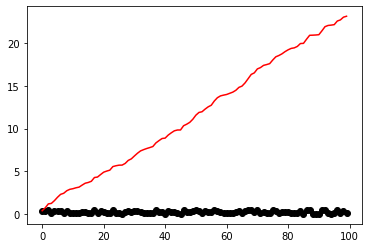

In [39]:
T = 100

# discrete random
sequencer = SymbolicSequencer(label='random sequence', set_size=T)
sequence = sequencer.generate_random_sequence(T=T)
embedding = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=1, distribution=np.random.uniform, parameters={
    'low': 0., 'high': 0.5})

stim_seq = embedding.draw_stimulus_sequence(sequence, as_array=True)
target_outputs = [{'label': 'integrator', 'output': np.cumsum(stim_seq), 'accept': [True for _ in sequence]}]

plt.plot(stim_seq[0], 'o-k')
plt.plot(target_outputs[0]['output'], 'r-')
plt.show()

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:108 - INFO] Generating 10 strings...
[sequences.py:140 - INFO] Generating a random sequence of length 20, from a set of 2 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 2 symbols encoded as one-hot
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:363 - INFO] Populating Stimulus Set: 
[embeddings.py:91 - INFO] - 2 symbols encoded as continuous signal unfolding
[embeddings.py:656 - INFO] Generating stimulus sequence: 29 symbols
[embeddings.py:606 - INFO] Concatenating stimulus sequence


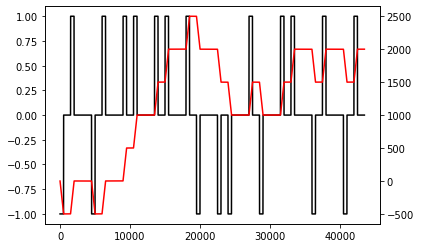

In [48]:
sequencer = SymbolicSequencer(label='random sequence', alphabet=['A', 'B'], eos='#')
sequencer.generate_stringset(set_length=10, length_range=(2, 2))
sequence = sequencer.generate_sequence()
embedding = VectorEmbeddings(vocabulary=sequencer.tokens).one_hot()
embedding.stimulus_set.update({'#': np.zeros_like(embedding.stimulus_set['A']),
                               'B': -1*embedding.stimulus_set['B']})
sig = embedding.unfold(to_signal=True, **{'duration': 50., 'amplitude': 1.})
signal = sig.draw_stimulus_sequence(sequence, onset_time=0.1, continuous=True, intervals=100.)[0].as_array().sum(axis=0)

target_outputs = [{'label': 'integrator', 'output': np.cumsum(signal), 'accept': [True for _ in sequence]}]

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(signal, 'k-')
ax1.plot(target_outputs[0]['output'], 'r-')
plt.show()

## 7.5.3. (Temporal) XOR

The logical operation ‘exclusive or’ (XOR) is a commonly used non-linear task

the network output (red traces) is a delayed positive deflection if two
successive input pulses have different signs and is a negative deflection if
the signs are the same.  

logical operation ‘exclusive or’ (XOR) is a most fundamental non-linear task

**References:**

[[1](https://www.nature.com/articles/nn.4241)] - Abbott, L. F., DePasquale, B., & Memmesheimer, R.-M. (2016). Building functional networks of spiking model neurons. Nature Neuroscience, 19(3), 350–355.



* Discrete

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:108 - INFO] Generating 25 strings...
[sequences.py:140 - INFO] Generating a random sequence of length 50, from a set of 2 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 2 symbols encoded as one-hot
[embeddings.py:219 - INFO] Generating stimulus sequence: 74 symbols


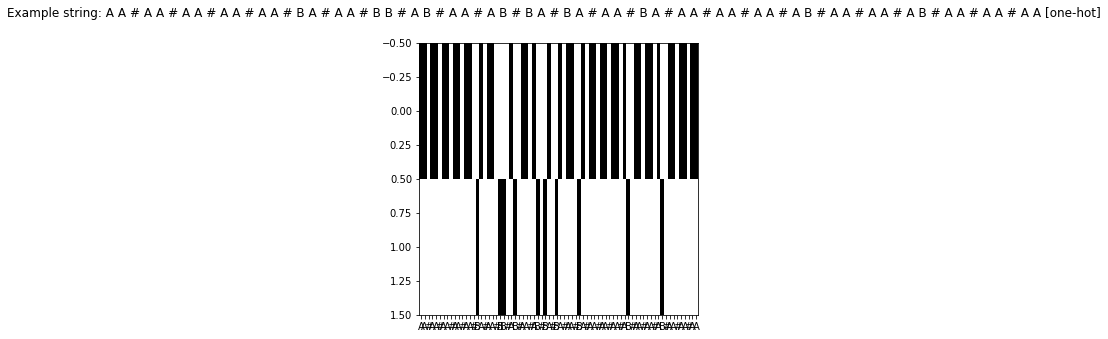

/home/neuro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning:In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

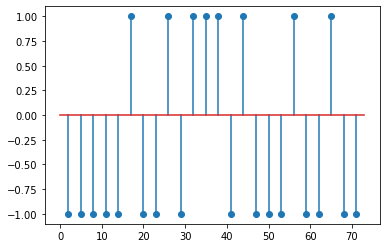

In [50]:
from fna.tasks.symbolic.sequences import SymbolicSequencer
from fna.tasks.symbolic.embeddings import VectorEmbeddings

sequencer = SymbolicSequencer(label='random sequence', alphabet=['A', 'B'], eos='#')
sequencer.generate_stringset(set_length=25, length_range=(2, 2))
sequence = sequencer.generate_sequence()

indices = [i for i, x in enumerate(sequence) if x == sequencer.eos]
output = [None for _ in sequence]
accept = [False for _ in sequence]
for idx in indices:
    accept[idx] = True
    if sequence[idx-2] != sequence[idx-1]:
        output[idx] = 1.
    elif sequence[idx-2] == sequence[idx-1]:
        output[idx] = -1.
target_outputs = [{'label': 'XOR', 'output': output, 'accept': accept}]

embedding = VectorEmbeddings(vocabulary=sequencer.tokens).one_hot()
embedding.stimulus_set.update({'#': np.zeros_like(embedding.stimulus_set['A'])})
embedding.plot_sample(sequence)

plt.stem(output)

* Continuous

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:108 - INFO] Generating 10 strings...
[sequences.py:140 - INFO] Generating a random sequence of length 20, from a set of 2 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 2 symbols encoded as one-hot
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:363 - INFO] Populating Stimulus Set: 
[embeddings.py:91 - INFO] - 2 symbols encoded as continuous signal unfolding
[embeddings.py:656 - INFO] Generating stimulus sequence: 29 symbols
[embeddings.py:606 - INFO] Concatenating stimulus sequence


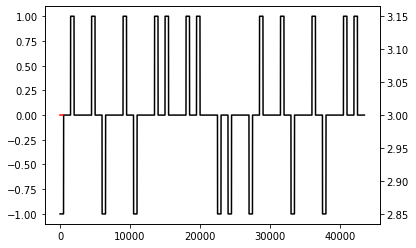

In [65]:
sequencer = SymbolicSequencer(label='random sequence', alphabet=['A', 'B'], eos='#')
sequencer.generate_stringset(set_length=10, length_range=(2, 2))
sequence = sequencer.generate_sequence()
embedding = VectorEmbeddings(vocabulary=sequencer.tokens).one_hot()
embedding.stimulus_set.update({'#': np.zeros_like(embedding.stimulus_set['A']),
                               'B': -1*embedding.stimulus_set['B']})
sig = embedding.unfold(to_signal=True, **{'duration': 50., 'amplitude': 1.})
signal = sig.draw_stimulus_sequence(sequence, onset_time=0.1, continuous=True, intervals=100.)[0].as_array().sum(axis=0)

indices = [i for i, x in enumerate(sequence) if x == sequencer.eos]
output = [0. for _ in sequence]
accept = [False for _ in sequence]
for idx in indices:
    accept[idx] = True
    if sequence[idx-2] != sequence[idx-1]:
        output[idx] = 1.
    elif sequence[idx-2] == sequence[idx-1]:
        output[idx] = -1.
        
from tools.signals import make_simple_kernel 
from scipy.signal import fftconvolve
kern = make_simple_kernel('box', width=50., height=1., resolution=0.1, normalize=False)
out = fftconvolve(np.array(output), kern, mode='valid')

target_outputs = [{'label': 'Continuous XOR', 'output': out, 'accept': accept}]

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(signal, 'k-')
ax1.plot(target_outputs[0]['output'], 'r-')
plt.show()

## 7.5.4. Nonlinear Autoregressive Moving Average (NARMA)

The non-linear autoregressive moving average (NARMA) task is a standard signal processing benchmark task (e.g. [[1](https://www.ncbi.nlm.nih.gov/pubmed/17517492)], [[2](https://arxiv.org/abs/1401.2224)])
involving the computation of nonlinear temporal dependencies. 

As in previous cases, the input $u(t)$ used in this task is a time series composed of i.i.d. values typically drawn from a uniform distribution in some predefined interval. The target output is given by:

$$y(t) = \alpha y(t-\delta) + \beta y(t-\delta) \sum_{i=1}^{n} y(t-\delta i) + \gamma u(t-n) u(t-\delta) + \epsilon$$

for the n-th order NARMA system, and for an input/target resolution $\delta$ (typically $=1$, unless otherwise stated). The remaining parameters are set to $\alpha=0.3$, $\beta=0.05$, $\gamma=1.5$ and $\epsilon=0.1$, following [[2](https://arxiv.org/abs/1401.2224)], [[3](http://papers.nips.cc/paper/2318-adaptive-nonlinear-system-identification-with-echo-state-networks)], [[4](https://arxiv.org/abs/1810.07135)], [[5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3195233/?tool=pmcentrez&report=abstract)]. Note that, if the order of the NARMA process is $\geq 20$, an additional $tanh$ nonlinearity is added, to saturate the output and circumvent known stability problems of NARMA processes at these orders. In the majority of the literature, the order of the process is taken to be $10$, $15$ or $20$. 

The system's performance in this task is evaluated by the Mean Squared Error (MSE), or NMSE/NRMSE, as the difference between the produced readout output $\hat{y}$ and the target output $y$. The task is interesting because it constitutes a challenging signal processing problem because of the nonlinearity and dependence on long time-lags. 

**Task summary:**

* Input: $u(t) \sim p(u)$, typically with $p(u)=\mathcal{U}_{[0., 0.5]}$ 
* Target outputs: $y(t)$
* Metric: MSE($\hat{y}$, $y$)

**References:**

[[1](https://www.ncbi.nlm.nih.gov/pubmed/17517492)] - Verstraeten, D., Schrauwen, B., D’Haene, M., & Stroobandt, D. (2007). An experimental unification of reservoir computing methods. Neural Networks, 20(3), 391–403.

[[2](https://arxiv.org/abs/1401.2224)] - Goudarzi, A., Banda, P., Lakin, M. R., Teuscher, C., & Stefanovic, D. (2014). A Comparative Study of Reservoir Computing for Temporal Signal Processing. Computing Research Repository, (Dl), 1–11.

[[3](http://papers.nips.cc/paper/2318-adaptive-nonlinear-system-identification-with-echo-state-networks)] - Jaeger, H. (2002). Adaptive Nonlinear System Identification with Echo State Networks. Advances in Neural Information Processing Systems (NIPS), 593–600. 

[[4](https://arxiv.org/abs/1810.07135)] - Dale, M., Miller, J. F., Stepney, S., & Trefzer, M. A. (2019). A substrate-independent framework to characterize reservoir computers. Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, 475(2226), 1–19. 

[[5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3195233/?tool=pmcentrez&report=abstract)] - Appeltant, L., Soriano, M. C., Van Der Sande, G., Danckaert, J., Massar, S., Dambre, J., … Fischer, I. (2011). Information processing using a single dynamical node as complex system. Nature Communications, 2(1), 468.


In [18]:
from fna.tasks.symbolic.sequences import SymbolicSequencer
from fna.tasks.symbolic.embeddings import VectorEmbeddings

T = 1000

sequencer = SymbolicSequencer(label='random sequence', set_size=T)
sequence = sequencer.generate_random_sequence(T=T)

embedding = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=1, distribution=np.random.uniform, parameters={
    'low': 0., 'high': 0.5})

[sequences.py:89 - INFO] Generating symbolic sequencer
[sequences.py:140 - INFO] Generating a random sequence of length 1000, from a set of 1000 symbols
[embeddings.py:28 - INFO] Creating symbolic embeddings
[embeddings.py:91 - INFO] - 1000 symbols encoded as scalar-uniform


In [19]:
stim_seq = embedding.draw_stimulus_sequence(sequence, as_array=True)

[embeddings.py:219 - INFO] Generating stimulus sequence: 1000 symbols


In [21]:
from fna.tasks.analog import narma

target_narma10 = narma(stim_seq[0], n=10)
target_narma15 = narma(stim_seq[0], n=15)
target_narma30 = narma(stim_seq[0], n=30)

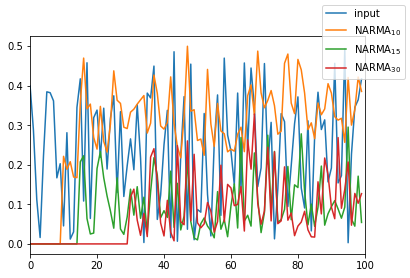

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(stim_seq[0][:100], label='input')
ax.plot(target_narma10[:100], label=r'$\mathrm{NARMA_{10}}$')
ax.plot(target_narma15[:100], label=r'$\mathrm{NARMA_{15}}$')
ax.plot(target_narma30[:100], label=r'$\mathrm{NARMA_{30}}$')
ax.set_xlim([0., 100.])
fig.legend()

## 7.5.5. Mackey-Glass chaotic time series (MG)

* Time-delay differential system

$\frac{dy}{dt} = \beta y(t) + \frac{\alpha y(t-\tau)}{1+y(t-\tau)^{10}}$

* Chaotic time series prediction - emulating a chaotic dynamical system

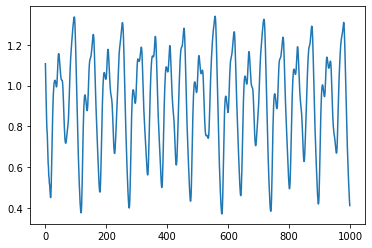

In [27]:
from fna.tasks.analog import mackey_glass
input_ = mackey_glass(sample_len=1000, tau=17, n_samples=1)[0][0]
plt.plot(input_)

In [38]:
n_pred = 1
output = [None for _ in input_]
output[:-n_pred] = input_[n_pred:]
accept = [True if i is not None else False for i in output]
out = {'label': '{0}-step prediction'.format(n_pred), 'output': output, 'accept': accept}

print(out['label'])
display(HTML(pd.DataFrame({'Input': mg[0][0][:20], 'Ouput': out['output'][:20], 'Accept': out['accept'][:20]}).transpose().to_html(header=False)))

1-step prediction


Input,1.11274,1.05964,0.971934,0.903599,0.836841,0.789028,0.748189,0.708829,0.662409,0.646296,0.600428,0.594036,0.552962,0.523391,0.494935,0.492289,0.491245,0.475492,0.484855,0.512471
Ouput,1.01875,0.955201,0.887147,0.827838,0.783424,0.765674,0.7149,0.666578,0.620083,0.600385,0.559204,0.547191,0.520031,0.513443,0.488113,0.464454,0.45138,0.465035,0.510971,0.576909
Accept,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


## 7.5.6. Logistic map
$$x(t + 1) = 4x(t)(1 − x(t))$$

## 7.5.5. N-bit flip-flop

## 7.5.6. Pattern generation (*)

## 7.5.7. Long short-term memory (LSTM) benchmarks 
In this section, and to analyse important computational processes related to processing memory, we resort to a set of tasks introduced in Hchreiter amd Shmidhuber 1997 and later revisited in Marten and Sutskever, 2011 amd in Jaeger 2012.

In the original formulations, the long memory spans required are realized by generic sigmoidal unit networks which are simply trained on targets that incorporate long-term memory effects.

The tasks consist of $N^{\mathrm{trial}}$ trials. In each trial, the dataset is divided into train and test sets, with the training data being composed of $N^{\mathrm{train}}$ input sequences ($u_{1}, ..., u_{N^{\mathrm{train}}}$) or input strings of length $T_{1}, ..., T_{N^{\mathrm{train}}}$. In most cases, unless explicitly stated, the length is equal for all input strings, i.e. $T_{n} = T_{\mathrm{train}} \forall n \in [1, T_{\mathrm{train}}]$.

* Addition Task

* Multiplication Task

* XOR Task

* N-Symbol Temporal order Task

* Random Permutation Task
